In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")

In [3]:
pref["日付"] = pd.to_datetime(pref["日付"] )

In [4]:
all_jp = pref.groupby(["日付"], as_index=False).sum()
del all_jp["都道府県コード"]
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]

In [5]:
all_jp["weekday"] = all_jp["日付"].dt.weekday


In [6]:
all_jp["感染者数移動平均7"] = all_jp["各地の感染者数_1日ごとの発表数"].rolling(7).mean()
all_jp.tail()

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,感染者数移動平均7
473,2021-05-03,4454,49,0,5372.571429
474,2021-05-04,4192,50,1,5263.571429
475,2021-05-05,4054,60,2,5016.571429
476,2021-05-06,4346,65,3,4795.000000
477,2021-05-07,6035,148,4,4988.714286


In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


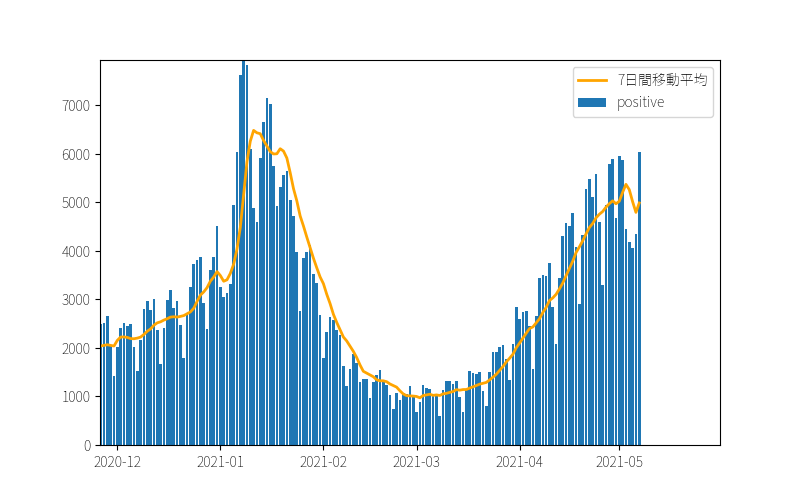

In [8]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)
plt.bar(all_jp["日付"],all_jp["各地の感染者数_1日ごとの発表数"],label="positive")
plt.plot_date(all_jp["日付"],all_jp["感染者数移動平均7"],label="7日間移動平均", fmt="-",lw=2.0, color="orange")
plt.legend()


## 曜日別陽性者集計

In [9]:
all_jp_week_mean = all_jp.groupby(["weekday"]).mean()[["各地の感染者数_1日ごとの発表数","各地の死者数_1日ごとの発表数"]].sort_index()
weekdays = pd.DataFrame({"曜日":["月","火","水","木","金","土","日"]})
all_jp_week_mean = pd.merge(all_jp_week_mean, weekdays, left_on="weekday", right_index=True, how="left")
all_jp_week_mean


,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,曜日
weekday,,,
0,888.897059,20.338235,月
1,1206.250000,26.029412,火
2,1413.897059,25.617647,水
3,1511.405797,23.695652,木
4,1479.927536,26.420290,金
5,1451.029412,19.985294,土
6,1196.661765,15.352941,日


<IPython.core.display.Javascript object>


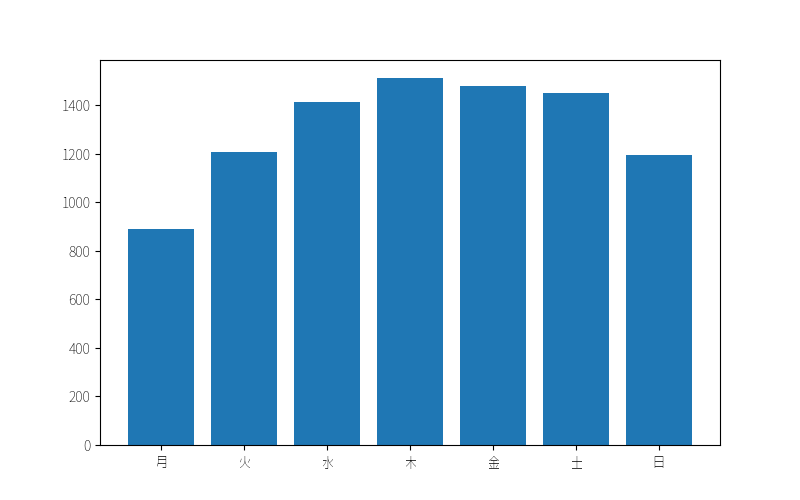

<BarContainer object of 7 artists>

In [10]:
fig = plt.figure(figsize=(8,5))
plt.bar(all_jp_week_mean["曜日"],all_jp_week_mean["各地の感染者数_1日ごとの発表数"])
#plt.bar(all_jp_week_mean["曜日"],all_jp_week_mean["各地の死者数_1日ごとの発表数"])
#plt.legend()